In [1]:
!pip install concrete-ml

INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.6/626.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 678.1/678.1 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Standard Model MSE: 0.8066
Concrete-ML Model MSE: 0.8213


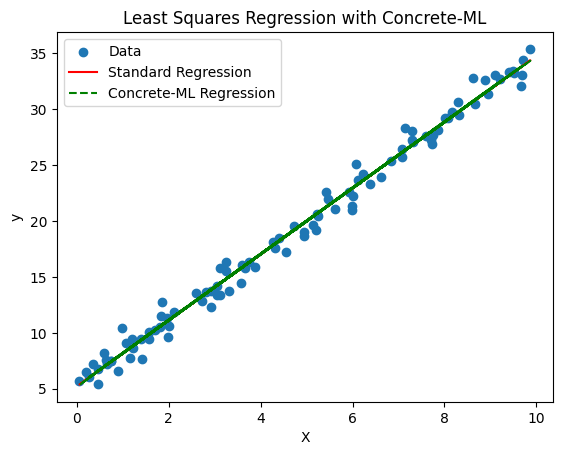

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from concrete.ml.sklearn import LinearRegression as ConcreteLinearRegression

# Step 1: Generate a simple dataset
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X[:, 0] + 5 + np.random.randn(100)  # Linear relationship with noise

# Step 2: Train a Standard Least Squares Regression Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluate standard model
mse = mean_squared_error(y, y_pred)
print(f"Standard Model MSE: {mse:.4f}")

# Step 3: Train Concrete-ML Least Squares Model
concrete_model = ConcreteLinearRegression(n_bits=8)  # Use 8-bit quantization
concrete_model.fit(X, y)
y_pred_concrete = concrete_model.predict(X)

# Evaluate Concrete-ML model
mse_concrete = mean_squared_error(y, y_pred_concrete)
print(f"Concrete-ML Model MSE: {mse_concrete:.4f}")

# Step 4: Properly Quantize Inputs Before Compilation
X_quantized = concrete_model.quantize_input(X)

# Step 5: Convert Model to an Encrypted Version
quantized_model = concrete_model.compile(X_quantized)

# Step 6: Run Encrypted Predictions with Correct Input Format
encrypted_predictions = np.array([
    quantized_model.encrypt_run_decrypt(x.reshape(1, -1)) for x in X_quantized
])

# Fix shape issue
encrypted_predictions = encrypted_predictions.squeeze()  # Convert from (100, 1, 1) -> (100,)

# Plot results
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, label="Standard Regression", color="red")
plt.plot(X, y_pred_concrete, label="Concrete-ML Regression", color="green", linestyle="dashed")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Least Squares Regression with Concrete-ML")
plt.show()
